In [3]:
from lexnorm.definitions import DATA_PATH
import os
import pandas as pd

# train = pd.read_csv(os.path.join(DATA_PATH, "hpc/train_annotated.txt"), index_col=0)
dev = pd.read_csv(os.path.join(DATA_PATH, "hpc/dev_annotated_with_train_info.txt"), index_col=0)


In [4]:
from sklearn import preprocessing

dev.fillna(0, inplace=True)
X_dev = dev.drop(["correct", "process", "tweet", "tok", "gold", "orig_same_order"], axis=1)

feature_vals = X_dev.values
scaler = preprocessing.StandardScaler().fit(feature_vals)
feature_vals = scaler.transform(feature_vals)
X_dev[:] = feature_vals
X_dev["correct"] = dev["correct"]

In [45]:
X_dev

,cosine_to_orig,embeddings_rank,from_clipping,from_original_token,from_split,norms_seen,spellcheck_rank,in_lexicon,length,same_order,orig_norms_seen,orig_in_lexicon,orig_length,correct
an,0.628990,-0.153380,-2.506163,-0.097673,-0.04852,-0.048773,0.911612,0.237000,-2.073917,-3.052057,-0.659838,0.339173,0.401761,0.0
ca,0.060307,-0.153380,-2.506163,-0.097673,-0.04852,-0.048773,1.307755,0.237000,-2.073917,-3.052057,-0.659838,0.339173,0.401761,0.0
cab,0.084827,-0.153380,-2.506163,-0.097673,-0.04852,-0.048773,0.119326,0.237000,-1.743268,-3.052057,-0.659838,0.339173,0.401761,0.0
cam,0.263270,-0.153380,-2.506163,-0.097673,-0.04852,-0.048773,0.515469,0.237000,-1.743268,-3.052057,-0.659838,0.339173,0.401761,0.0
can,3.547581,-0.153380,0.399016,10.238275,-0.04852,4.895531,-0.276817,0.237000,-1.743268,0.327648,-0.659838,0.339173,0.401761,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lulu,0.742557,-0.153380,-2.506163,-0.097673,-0.04852,-0.048773,5.269188,0.237000,-1.412619,-3.052057,0.233969,0.339173,0.401761,0.0
pol,-0.057808,-0.153380,-2.506163,-0.097673,-0.04852,-0.048773,3.288472,0.237000,-1.743268,-3.052057,0.233969,0.339173,0.401761,0.0
smh,3.061526,1.146888,-2.506163,-0.097673,-0.04852,-0.048773,-0.276817,-4.219404,-1.743268,-3.052057,0.233969,0.339173,0.401761,0.0
sol,0.201608,-0.153380,-2.506163,-0.097673,-0.04852,-0.048773,0.911612,0.237000,-1.743268,-3.052057,0.233969,0.339173,0.401761,0.0


In [9]:
from sklearn.manifold import MDS

mds = MDS(2, random_state=0)
X_train_2d = mds.fit_transform(X_train[:1000])

/Users/elijoe/Library/Mobile Documents/com~apple~CloudDocs/Documents/2/Diss/lexnorm/.venv/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [1]:
X_train_2d

NameError: name 'X_train_2d' is not defined

In [8]:
# X_dev.reset_index(inplace=True)
test = pd.melt(X_dev, id_vars=["correct"], ignore_index=False)

In [9]:
test = test.groupby("variable").apply(lambda x: x.sample(frac=0.01))

[Text(0, 0, 'cosine_to_orig'),
 Text(1, 0, 'embeddings_rank'),
 Text(2, 0, 'from_clipping'),
 Text(3, 0, 'from_original_token'),
 Text(4, 0, 'from_split'),
 Text(5, 0, 'in_lexicon'),
 Text(6, 0, 'length'),
 Text(7, 0, 'norms_seen'),
 Text(8, 0, 'orig_in_lexicon'),
 Text(9, 0, 'orig_length'),
 Text(10, 0, 'orig_norms_seen'),
 Text(11, 0, 'same_order'),
 Text(12, 0, 'spellcheck_rank')]

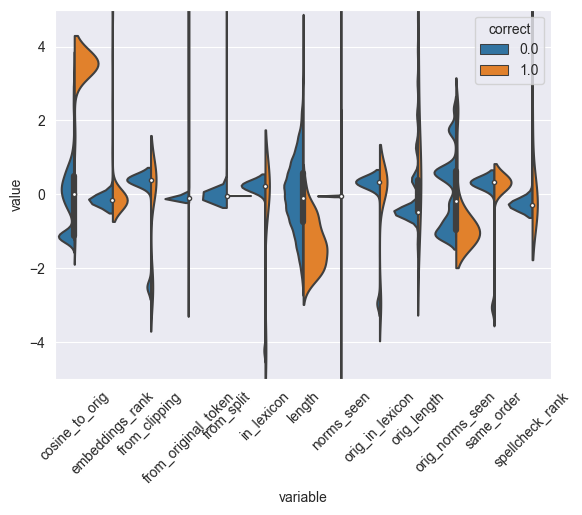

In [26]:
import seaborn as sns

# ax.set(ylim=(-5, 5))
g = sns.violinplot(data=test, x="variable", y="value", hue="correct", split=True, width=1.25)
# plt.xticks(rotation=45)
g.set(ylim=(-5, 5))
g.set_xticklabels(g.get_xticklabels(), rotation=45)

In [1]:
from joblib import load
import os
from lexnorm.definitions import DATA_PATH

clf = load(os.path.join(DATA_PATH, "../models/rf.joblib"))
clf.oob_score_

0.9995095363270654

In [5]:
from lexnorm.models import normalise
import pandas as pd
import importlib

importlib.reload(normalise)

data = pd.read_csv(
        os.path.join(DATA_PATH, "hpc/train_ngrams.txt"), index_col=0, keep_default_na=False, na_values=""
    ).sample(
        frac=1,
        # random_state=42,
    )
train_X, train_y = normalise.prep_train(data)

In [5]:
train_X

NameError: name 'train_X' is not defined

/var/folders/hh/t1nn3n8x30dbwp43lzbtz2cc0000gn/T/ipykernel_7972/3157309396.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cands.corr())


<AxesSubplot: >

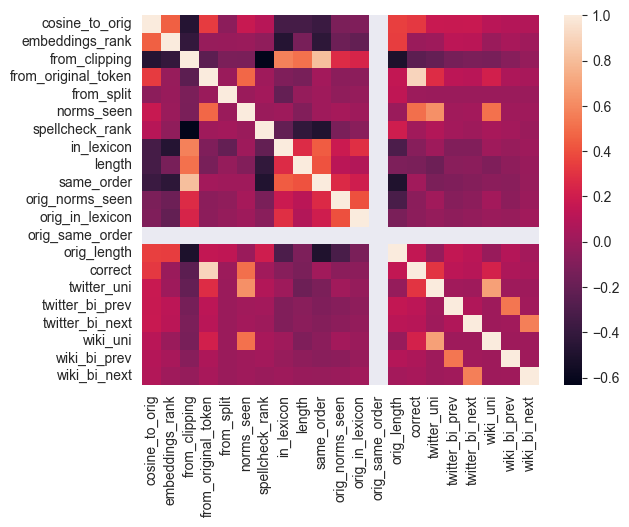

In [13]:
from lexnorm.generate_extract.process import create_index
from lexnorm.models.normalise import load_candidates, prep_train, prep_test
import seaborn as sns
from lexnorm.definitions import DATA_PATH
import os

cands = prep_test(create_index(load_candidates(os.path.join(DATA_PATH, "hpc/cv/train_0.txt"))))
sns.heatmap(cands.corr())

{'cosine_to_orig': 0.6353440436495913, 'embeddings_rank': 0.6362534101242803, 'from_clipping': 0.6368596544407396, 'from_original_token': 0.634737799333132, 'from_split': 0.6359502879660506, 'norms_seen': 0.5910882085480443, 'spellcheck_rank': 0.6350409214913617, 'in_lexicon': 0.6362534101242803, 'length': 0.6365565322825099, 'same_order': 0.635647165807821, 'orig_norms_seen': 0.6398908760230374, 'orig_in_lexicon': 0.6353440436495913, 'orig_same_order': 0.6350409214913617, 'orig_length': 0.6359502879660506, 'twitter_uni': 0.6292816004849956, 'twitter_bi_prev': 0.6298878448014549, 'twitter_bi_next': 0.6292816004849956, 'wiki_uni': 0.6341315550166713, 'wiki_bi_prev': 0.6338284328584416, 'wiki_bi_next': 0.6371627765989691}
